# Ebola outbreak of 2014-2016

This is an effort to find which countries were most affected by the Ebola outbreak between August 2014 to March 2016.
This is my first independent project.

### Introduction

Let's start with importing the used Python libraries and the used data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../input/ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv", parse_dates=['Date'])
data.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
# Renaming column values and column names to reduce space.
data['Country'] = data['Country'].str.replace('United States of America', 'USA')
data['Country'] = data['Country'].str.replace('United Kingdom', 'UK')
data = data.rename(columns={'No. of suspected cases':'suspected cases',
                            'No. of probable cases':'probable cases',
                            'No. of confirmed cases':'confirmed cases',
                            'No. of confirmed, probable and suspected cases': 'all cases',
                            'No. of suspected deaths': 'suspected deaths',
                            'No. of probable deaths': 'probable deaths',
                            'No. of confirmed deaths': 'confirmed deaths',
                            'No. of confirmed, probable and suspected deaths': 'all deaths',
                            })

A small bit of data cleaning. Fillna() gets rid of the NaN issue within the data but it does not make it accurate or reliable. Replacing the NaN values with 0 is used here.


In [4]:
data = data.fillna(float(0))

In [5]:
#Let's view the first 5 rows of the dataset
data.head()

,Country,Date,suspected cases,probable cases,confirmed cases,all cases,suspected deaths,probable deaths,confirmed deaths,all deaths
0,Guinea,2014-08-29,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430.0
1,Nigeria,2014-08-29,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7.0
2,Sierra Leone,2014-08-29,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422.0
3,Liberia,2014-08-29,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694.0
4,Sierra Leone,2014-09-05,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491.0


In [6]:
#And now the last 5 rows
data.tail()

,Country,Date,suspected cases,probable cases,confirmed cases,all cases,suspected deaths,probable deaths,confirmed deaths,all deaths
2480,Liberia,2016-03-23,5636.0,1879.0,3151.0,10666.0,0.0,0.0,0.0,4806.0
2481,Italy,2016-03-23,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2482,Liberia,2016-03-23,0.0,3.0,2.0,5.0,0.0,3.0,1.0,4.0
2483,Nigeria,2016-03-23,0.0,1.0,19.0,20.0,0.0,1.0,7.0,8.0
2484,USA,2016-03-23,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1.0


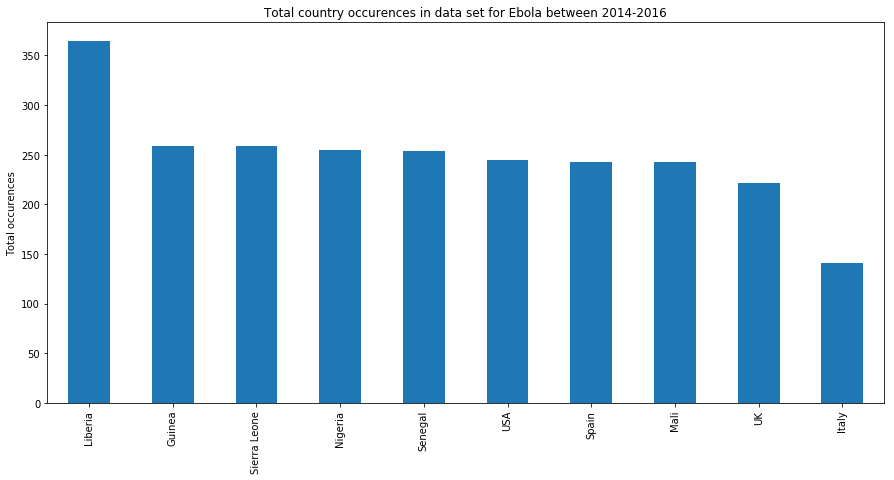

In [7]:
country_count = data['Country'].value_counts()
plt.figure(figsize=(15, 7))
plt.ylabel('Total occurences')
plt.title('Total country occurences in data set for Ebola between 2014-2016')
country_count.plot(kind='bar')
plt.show()

Important to note: the amount of cases within the dataset is a compounded sum. So for example in Liberia on 2014-08-29, the total deaths were 225. And then on the 2014-09-05 there was 431 confirmed deaths. So the number of NEW deaths between those two dates would be 206 (431 - 225 = 206). So calculating the sum of the confirmed deaths column would not be accurate. To get the total sum is just to groupby country and find the maximum in the confirmed deaths column:

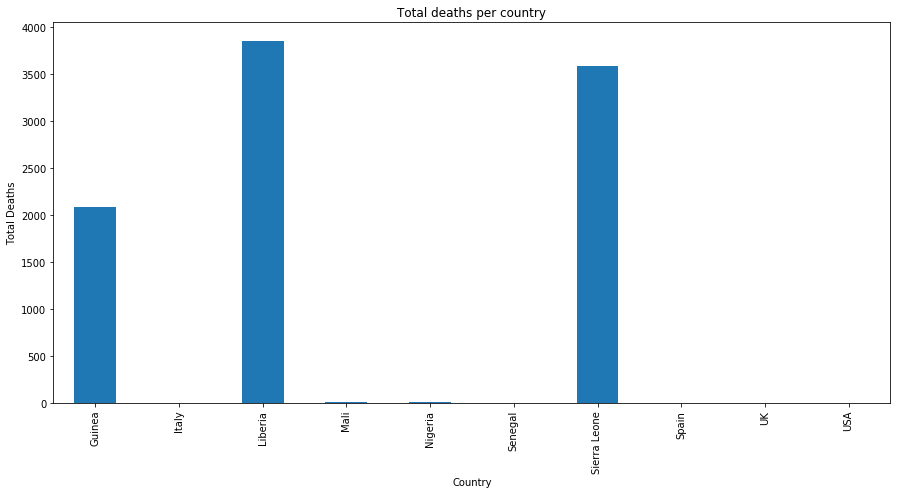

In [8]:
# correct amount of total deaths for whole dataset
max_deaths = data.groupby('Country')['confirmed deaths'].max()
plt.figure(figsize=(15, 7))
max_deaths.plot(kind='bar')
plt.ylabel('Total Deaths')
plt.xlabel('Country')
plt.title('Total deaths per country')
plt.show()

It's already quite clear that not all countries were affected equally.

### Suspected vs. Confirmed cases

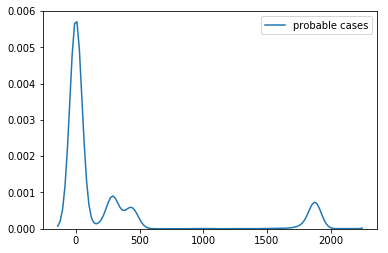

In [9]:
sns.kdeplot(data['probable cases'])

In [10]:
# Average suspected / confirmed cases
print(f"Average suspected cases within the dataset: {round(data['suspected cases'].mean(), 3)}")
print(f"Average confirmed cases within the dataset: {round(data['confirmed cases'].mean(), 3)}")

Average suspected cases within the dataset: 849.134
Average confirmed cases within the dataset: 1436.038


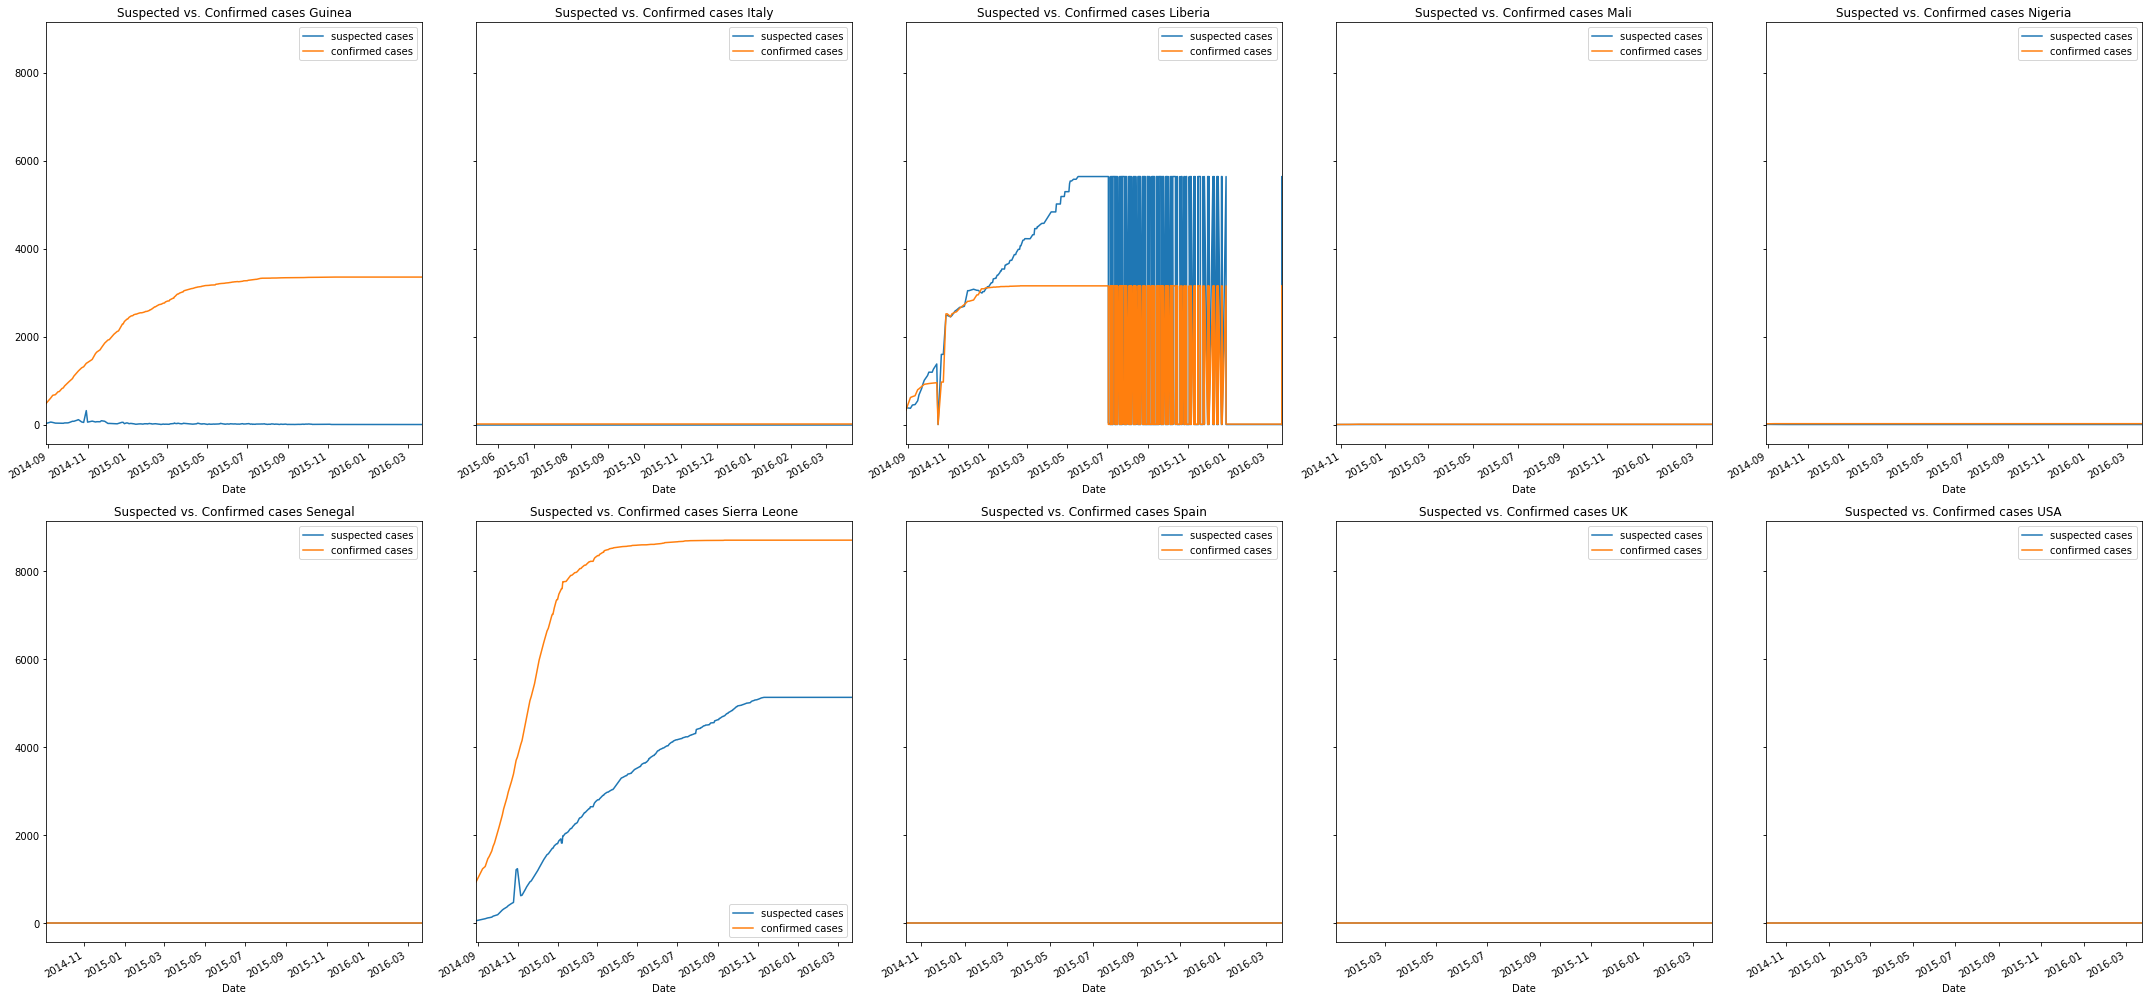

In [11]:
fig, ax = plt.subplots(2, 5, sharey=True, figsize=(30, 14))

for (c, d), a in zip(data.groupby('Country'),ax.ravel()):
    d.plot(x='Date',
           y=['suspected cases', 'confirmed cases'],
           title=f'Suspected vs. Confirmed cases {c}', ax=a, subplots=False)
plt.tight_layout()

Here we can already see that the use of the fillna() method with argument 0 creates a weird plot for Liberia.
Perhaps we should've filled the NaN values with the mean instead of 0.

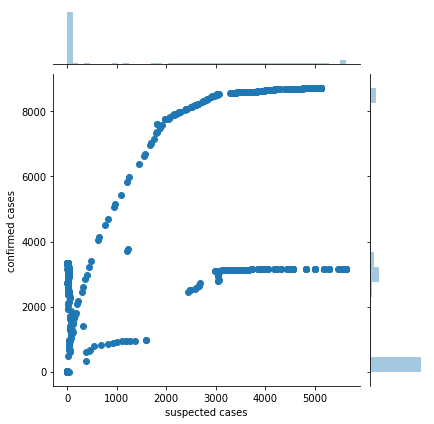

In [12]:
sns.jointplot(x='suspected cases', y='confirmed cases', data=data)

The graph above shows that as suspected cases goes up, so does confirmed cases. Which makes sense! However, around the coord (2000, 8000) the cases seem to level off. This could represent the point in time where Ebola had seemed to become under control and there was a vaccine in place. Suspected cases was still rising but confirmed cases was levelling off.

### Suspected vs. Confirmed deaths

In [13]:
# Average suspected / confirmed deaths
print(f"Average suspected deaths within the dataset: {round(data['suspected deaths'].mean(), 3)}")
print(f"Average confirmed deaths within the dataset: {round(data['confirmed deaths'].mean(), 3)}")

Average suspected deaths within the dataset: 17.317
Average confirmed deaths within the dataset: 518.382


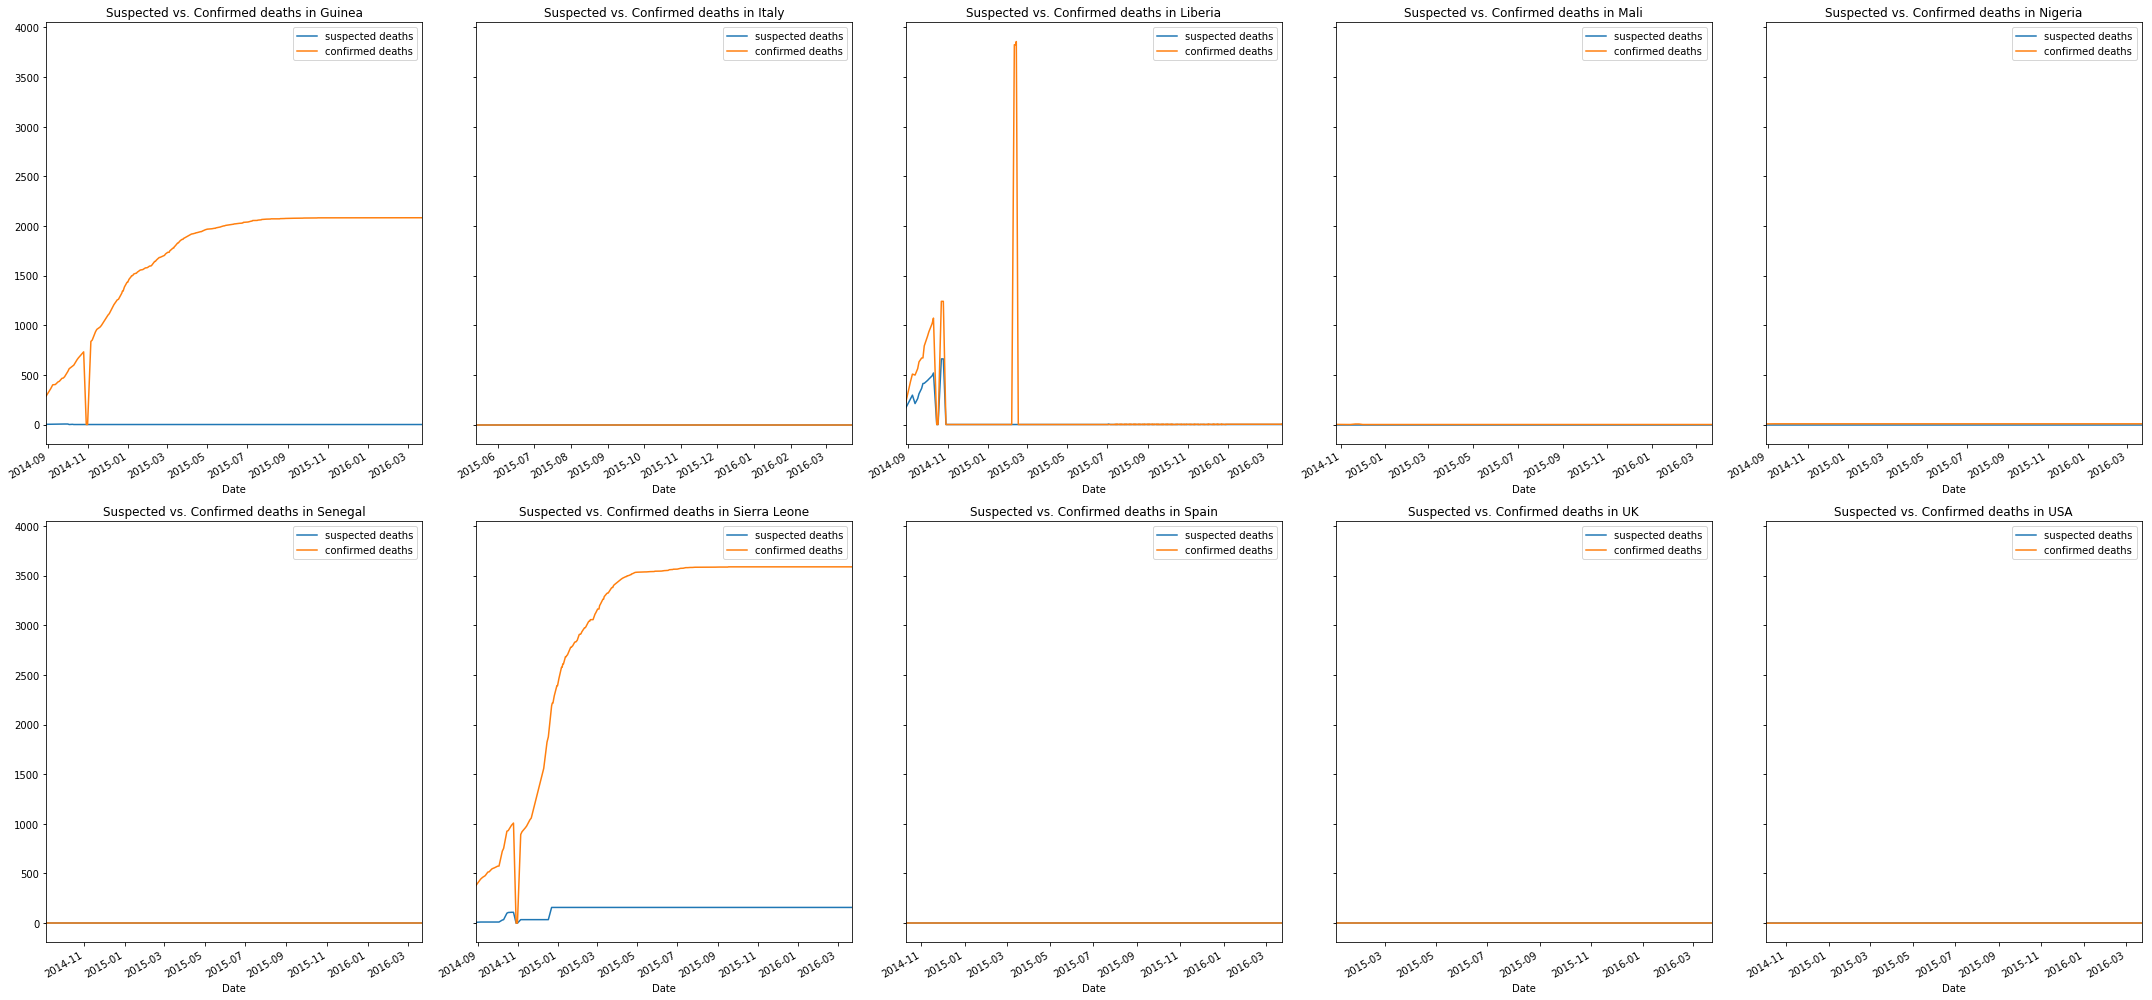

In [14]:
fig, ax = plt.subplots(2, 5, sharey=True, figsize=(30, 14))

for (c, d), a in zip(data.groupby('Country'), ax.ravel()):
    d.plot(x='Date',
          y=['suspected deaths', 'confirmed deaths'],
          title=f'Suspected vs. Confirmed deaths in {c}', ax=a, subplots=False)
plt.tight_layout()

Graphs to visualise the suspected deaths vs. confirmed deaths per country within the data set. As visualised, some countries had better outcomes than others which may be down to the country's individual response.

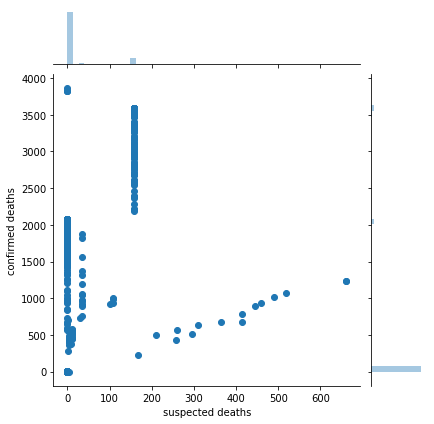

In [15]:
sns.jointplot(x='suspected deaths', y='confirmed deaths', data=data)

# Conclusion

It is clear from the graphs of this data set that only three countries had serious troubles with the ebola virus. Guinea, Liberia and Sierra Leone.